In [5]:
#import all the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [8]:
#retreving iris data from sklearn
iris= datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
#finding no of clusters
#1. converting datframe to array
x=iris_df.values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
#plotting elvow curve to find WCSS
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init= 'k-means++',max_iter=300, n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.472230158730156,
 39.03998724608725,
 34.299712121212124,
 30.063110617452725,
 28.27172172856384,
 26.094324740540415]

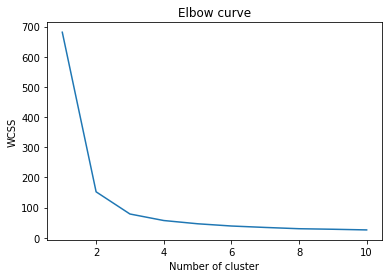

In [14]:
#plotting elbow curve
plt.plot(range(1,11),wcss)
plt.title("Elbow curve")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# by looking at the elbow curve, we can say that after 3 the WCSS will almost remain same, so we can take k as 3

In [16]:
#applying kmeans to the dataset
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
ymeans=kmeans.fit_predict(x)
ymeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

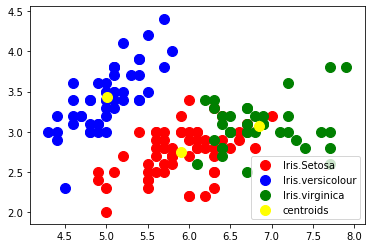

In [17]:
#Visualizing the clusers using scatter plot for all the columns in iris data set
plt.scatter(x[ymeans == 0, 0],x[ymeans==0,1], s=100,c='red',label= 'Iris.Setosa')
plt.scatter(x[ymeans == 1, 0],x[ymeans==1,1], s=100,c='blue',label= 'Iris.versicolour')
plt.scatter(x[ymeans == 2, 0],x[ymeans==2,1], s=100,c='green',label= 'Iris.virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='centroids')
plt.legend()
